In [5]:
%load_ext autoreload
%autoreload 2

from pathlib import Path

import matplotlib
import matplotlib.pyplot as plt 
import torch
from facenet_pytorch import MTCNN, InceptionResnetV1
from PIL import Image

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
mtcnn = MTCNN(image_size=240, keep_all=True, min_face_size=40)
resnet = InceptionResnetV1(pretrained="vggface2")

resnet = resnet.eval()

print(f"MTCNN image size: {mtcnn.image_size}")
print(f"MTCNN keeping all faces: {mtcnn.keep_all}")
print(f"InceptionResnet weight set: {resnet.pretrained}")

MTCNN image size: 240
MTCNN keeping all faces: True
InceptionResnet weight set: vggface2


In [7]:
embedding_data = torch.load("embeddings.pt")

print(f"Known names: {[data[1] for data in embedding_data]}")

Known names: ['mary_kom', 'ranveer']


In [8]:
project_dir = Path("Project4", "data")
images_dir = project_dir / "extracted_frames"

print(images_dir)

Project4\data\extracted_frames


In [9]:
sample_single = Image.open(images_dir / "frame_10.jpg")
sample_multiple = Image.open(images_dir / "frame_1280.jpg")

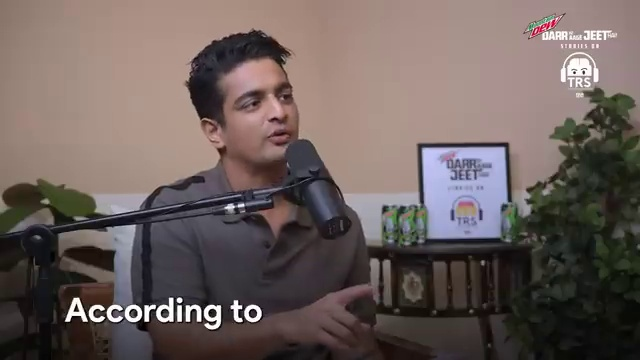

In [17]:
sample_single

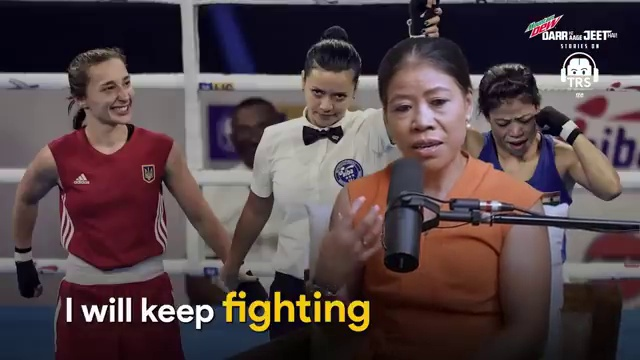

In [18]:
sample_multiple

In [19]:
def locate_faces(image):
    cropped_images, probs = mtcnn(image, return_prob=True)
    boxes, _ = mtcnn.detect(image)

    if boxes is None or cropped_images is None:
        return []
    else:
        return list(zip(boxes, probs, cropped_images))

In [20]:
multiple_faces = locate_faces(sample_multiple)
print(f"How many faces in the sample with 5 faces: {len(multiple_faces)}")


How many faces in the sample with 5 faces: 5


In [21]:
face = multiple_faces[0]
print(f"First bounding box: {face[0]}")
print(f"First probability: {face[1]}")
print(f"Shape of first cropped image: {face[2].shape}")

First bounding box: [385.8984680175781 64.89743041992188 466.64019775390625 171.3898162841797]
First probability: 0.9995344877243042
Shape of first cropped image: torch.Size([3, 240, 240])


In [22]:
def determine_name_dist(cropped_image, threshold=0.9):
    # Use `resnet` on `cropped_image` to get the embedding.
    emb = resnet(cropped_image.unsqueeze(0))

    # Compute the distance to each known embedding
    distances = []
    for known_emb, name in embedding_data:
        # Use torch.dist to compute the distance between
        # `emb` and the known embedding `known_emb`
        dist = torch.dist(emb, known_emb).item()
        distances.append((dist, name))

    # Find the name corresponding to the smallest distance
    dist, closest = min(distances)

    # If the distance is less than the threshold, set name to closest
    # otherwise set name to "Undetected"
    if dist < threshold:
        name = closest
    else:
        name = "Undetected"

    return name, dist

In [23]:
print("Who's in the picture with 5 faces, with distances?")
for index, face in enumerate(multiple_faces):
    print(f"{index}: {determine_name_dist(face[2])}")

Who's in the picture with 5 faces, with distances?
0: ('mary_kom', 0.6223788857460022)
1: ('Undetected', 1.036726713180542)
2: ('Undetected', 1.0629841089248657)
3: ('mary_kom', 0.8036865592002869)
4: ('Undetected', 1.133859395980835)


In [ ]:
def label_face(name, dist, box, axis):
    """Adds a box and a label to the axis from matplotlib
    - name and dist are combined to make a label
    - box is the four corners of the bounding box for the face
    - axis is the return from fig.subplots()
    Call this in the same cell as the figure is created"""

    # Generates a Rectangle for the bounding box
    # set the color to "blue" and fill to False
    rect =  plt.Rectangle(
            (box[0], box[1]),
            box[2] - box[0],
            box[3] - box[1],
            fill=False,
            color="blue",
    )
    axis.add_patch(rect)

    # Set color to be red if the name is "Undetected"
    # otherwise set it to be blue
    if name == "Undetected":
        color = "red"
    else:
        color = "blue"
    
    label = f"{name} {dist:.2f}"
    axis.text(box[0], box[1], label, fontsize="large", color=color)

: 

: 

: 

: 

: 

NameError: name 'label_face' is not defined

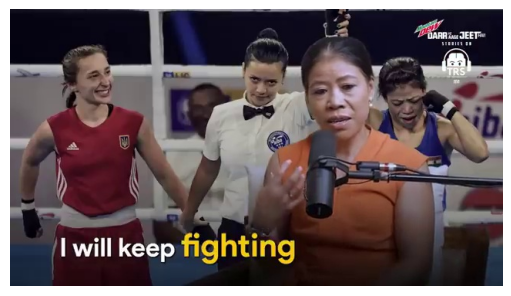

In [24]:
# This sets the image size
# and draws the original image
width, height = sample_multiple.size
dpi = 96
fig = plt.figure(figsize=(width / dpi, height / dpi), dpi=dpi)
axis = fig.subplots()
axis.imshow(sample_multiple)
plt.axis("off")

face = multiple_faces[0]
cropped_image = face[2]
box = face[0]

name, dist = determine_name_dist(cropped_image)

label_face(name, dist, box, axis)

NameError: name 'label_face' is not defined

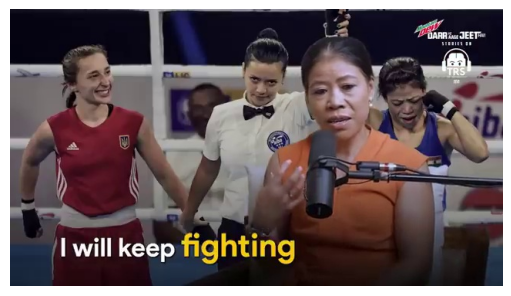

In [25]:
# This sets the image size
# and draws the original image
width, height = sample_multiple.size
dpi = 96
fig = plt.figure(figsize=(width / dpi, height / dpi), dpi=dpi)
axis = fig.subplots()
axis.imshow(sample_multiple)
plt.axis("off")

for face in multiple_faces:
    box, prob, cropped_image = face

    name, dist = determine_name_dist(cropped_image)

    label_face(name, dist, box, axis)

In [26]:
def add_labels_to_image(image):
    # This sets the image size
    # and draws the original image
    width, height = image.width, image.height
    dpi = 96
    fig = plt.figure(figsize=(width / dpi, height / dpi), dpi=dpi)
    axis = fig.subplots()
    axis.imshow(image)
    plt.axis("off")

    # Use the function locate_faces to get the individual face info
    faces = locate_faces(image)

    for box, prob, cropped in faces:
        # If the probability is less than 0.90,
        # It's not a face, skip this run of the loop with continue
        if prob < 0.9:
            continue
        
        # Call determine_name_dist to get the name and distance
        name, dist = determine_name_dist(cropped)

        # Use label_face to draw the box and label on this face
        label_face(name, dist, box, axis)

    return fig

NameError: name 'label_face' is not defined

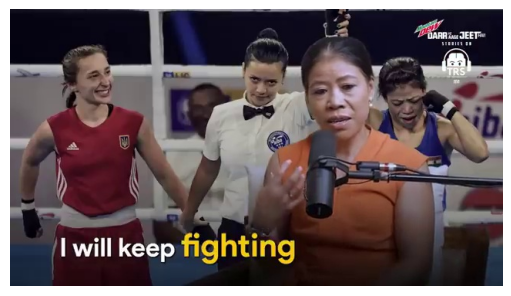

In [27]:
labeled_multiple = add_labels_to_image(sample_multiple)

NameError: name 'label_face' is not defined

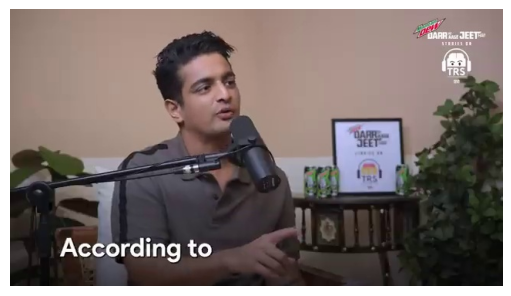

In [29]:

labeled_single = add_labels_to_image(sample_single)

In [30]:
import face_recognition

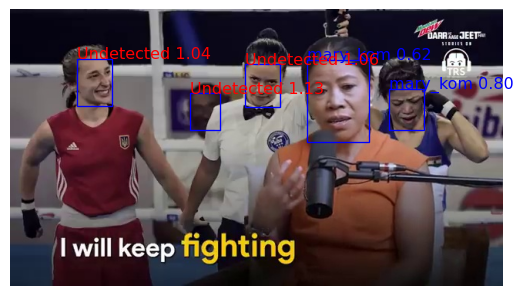

In [31]:
test_multiple = face_recognition.add_labels_to_image(sample_multiple)

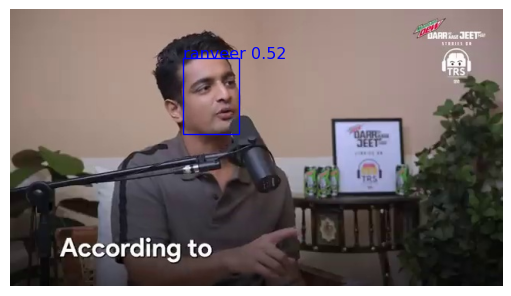

In [32]:
test_single =  face_recognition.add_labels_to_image(sample_single)

In [36]:
import app

In [37]:
assert hasattr(app, "add_labels_to_image"), "import not successful"

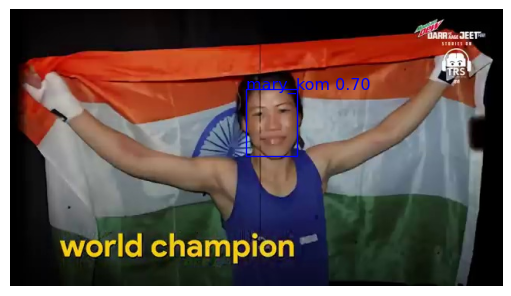

In [39]:
# Tests if the image processing worked
f = open("Project4/data/images/mary_kom/frame_115.jpg", "rb")
res = app.run_face_recognition(f)
f.close()

assert isinstance(res, matplotlib.figure.Figure), "Image did not process"